In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-24


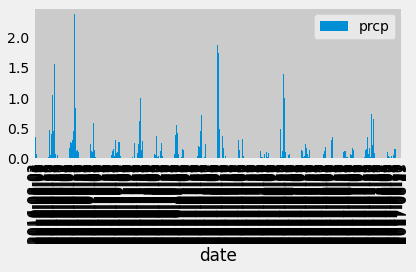

TypeError: 'str' object is not callable

In [123]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measure.station, Measure.date, Measure.prcp, Measure.tobs).\
    filter(Measure.date > '2016-08-01').\
    order_by(Measure.date).all()

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measure.date).\
            order_by(Measure.date.desc()).limit(1).all()

last_measure = last_date[0]
convert_start = last_measure[0]
last_year = convert_start[0:4]
last_year_num = int(convert_start[0:4])
last_month_num = int(convert_start[5:7])
last_day_num = int(convert_start[8:10])

year_ago = dt.date(last_year_num, last_month_num, last_day_num) - dt.timedelta(days=364)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
sel = [Measure.date,
       func.avg(Measure.prcp)]

data_agg = session.query(*sel).\
    filter(Measure.date > '2016-08-01').\
    group_by(Measure.date).\
    order_by(Measure.date).all()
data_agg

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_agg, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df = df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot.bar()
plt.tight_layout()
plt.show()
plt.ylabel('inches')

In [127]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_mean = precip_df['prcp'].mean()
prcp_median = precip_df['prcp'].median()
prcp_mode = precip_df['prcp'].mode()

print(prcp_mean)
print(prcp_median)
print(prcp_mode)

0.17340876092038865
0.072
0    0.0
dtype: float64


In [137]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).\
            filter(Measure.date > '2016-08-01').\
            order_by(Measure.date).all()
np.unique(stations)
len(np.unique(stations))

9

In [146]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel2 = [Measure.station,
        func.count(Measure.prcp)]

station_agg = session.query(*sel2).\
    filter(Measure.date > '2016-08-01').\
    group_by(Measure.station).\
    order_by((func.count(Measure.prcp).desc())).all()

station_agg

[('USC00519397', 380),
 ('USC00519281', 373),
 ('USC00513117', 364),
 ('USC00516128', 345),
 ('USC00519523', 335),
 ('USC00514830', 279),
 ('USC00517948', 67)]

In [150]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel3 = [Measure.station,
        func.min(Measure.tobs),
        func.max(Measure.tobs),
        func.avg(Measure.tobs)]

act_station = session.query(*sel3).\
    filter(Measure.station == 'USC00519397').\
    group_by(Measure.station).\
    order_by(Measure.station).all()

act_station

[('USC00519397', 56.0, 87.0, 74.55323054331865)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel3 = [Measure.station,
        Measure.date,
        Measure.tobs]



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
